In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
import time
import csv

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

## Functions

In [3]:
def modelpokemon(name):
    train_ds, val_ds, test_ds = getds(name)
        
    num_classes = len(train_ds.class_names)
    
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
    
    model = Sequential([
      layers.Rescaling(1./255, input_shape=(128, 128, 3)),
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.3),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.3),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.4),
      layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    
    history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=50
    )
    test_results = model.evaluate(test_ds, batch_size=128)
    
    return model, history, test_results   
    
def getds(name):
    batch_size = 32
    img_height = 128
    img_width = 128
    
    data_path = os.getcwd() + '\\PokeImages-by-type\\' + name
    train_ds = tf.keras.utils.image_dataset_from_directory(
      data_path,
      validation_split=0.3,
      subset="training",
      seed=52,
      image_size=(img_height, img_width),
      batch_size=batch_size)
    
    val_ds = tf.keras.utils.image_dataset_from_directory(
      data_path,
      validation_split=0.3,
      subset="validation",
      seed=52,
      image_size=(img_height, img_width),
      batch_size=batch_size)
    
    # https://errorsfixing.com/is-it-possible-to-split-a-tensorflow-dataset-into-train-validation-and-test-datasets-when-using-image_dataset_from_directory/
    split = round(len(val_ds) / 1.5)
    test_ds = val_ds.take(split)
    val_ds = val_ds.skip(split)
    
    return train_ds, val_ds, test_ds
    
def graphmodel(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(history.params['epochs'])

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

## Loop to Generate Model for Each Type

In [4]:
typelist = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Ghost', 
            'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']

In [5]:
%%time

vartracker = []

for poketype in typelist:
    model, history, test_results = modelpokemon(poketype)
    varlist = [poketype, model, history, test_results]
    vartracker.append(varlist)
    model.save(f'models/{poketype}_model')

Found 3062 files belonging to 72 classes.
Using 2144 files for training.
Found 3062 files belonging to 72 classes.
Using 918 files for validation.
Epoch 1/50
67/67 [==============================] - 29s 157ms/step - loss: 4.1563 - accuracy: 0.0476 - val_loss: 3.7729 - val_accuracy: 0.1484
Epoch 2/50
67/67 [==============================] - 1s 17ms/step - loss: 3.1172 - accuracy: 0.2584 - val_loss: 2.3765 - val_accuracy: 0.5355
Epoch 3/50
67/67 [==============================] - 1s 11ms/step - loss: 1.8613 - accuracy: 0.5252 - val_loss: 1.3969 - val_accuracy: 0.6903
Epoch 4/50
67/67 [==============================] - 1s 10ms/step - loss: 1.1317 - accuracy: 0.6880 - val_loss: 1.0396 - val_accuracy: 0.7742
Epoch 5/50
67/67 [==============================] - 1s 10ms/step - loss: 0.6733 - accuracy: 0.8083 - val_loss: 0.8239 - val_accuracy: 0.8323
Epoch 6/50
67/67 [==============================] - 1s 10ms/step - loss: 0.5556 - accuracy: 0.8470 - val_loss: 0.7208 - val_accuracy: 0.8516
Epoch

INFO:tensorflow:Assets written to: models/Bug_model\assets


INFO:tensorflow:Assets written to: models/Bug_model\assets


Found 1045 files belonging to 29 classes.
Using 732 files for training.
Found 1045 files belonging to 29 classes.
Using 313 files for validation.
Epoch 1/50
23/23 [==============================] - 2s 37ms/step - loss: 3.3338 - accuracy: 0.0751 - val_loss: 3.2540 - val_accuracy: 0.0787
Epoch 2/50
23/23 [==============================] - 0s 12ms/step - loss: 3.0575 - accuracy: 0.1448 - val_loss: 2.9188 - val_accuracy: 0.2360
Epoch 3/50
23/23 [==============================] - 0s 17ms/step - loss: 2.3526 - accuracy: 0.3648 - val_loss: 1.9673 - val_accuracy: 0.5730
Epoch 4/50
23/23 [==============================] - 0s 9ms/step - loss: 1.3682 - accuracy: 0.6216 - val_loss: 1.1625 - val_accuracy: 0.7416
Epoch 5/50
23/23 [==============================] - 0s 9ms/step - loss: 0.7626 - accuracy: 0.7910 - val_loss: 0.8449 - val_accuracy: 0.7865
Epoch 6/50
23/23 [==============================] - 0s 9ms/step - loss: 0.5318 - accuracy: 0.8443 - val_loss: 0.6690 - val_accuracy: 0.8539
Epoch 7/50


INFO:tensorflow:Assets written to: models/Dark_model\assets


INFO:tensorflow:Assets written to: models/Dark_model\assets


Found 1031 files belonging to 27 classes.
Using 722 files for training.
Found 1031 files belonging to 27 classes.
Using 309 files for validation.
Epoch 1/50
23/23 [==============================] - 2s 37ms/step - loss: 3.1882 - accuracy: 0.0873 - val_loss: 3.0897 - val_accuracy: 0.1765
Epoch 2/50
23/23 [==============================] - 0s 10ms/step - loss: 2.8081 - accuracy: 0.2368 - val_loss: 2.5466 - val_accuracy: 0.4118
Epoch 3/50
23/23 [==============================] - 0s 10ms/step - loss: 1.9180 - accuracy: 0.4543 - val_loss: 1.7686 - val_accuracy: 0.5765
Epoch 4/50
23/23 [==============================] - 0s 12ms/step - loss: 1.1706 - accuracy: 0.6690 - val_loss: 1.2629 - val_accuracy: 0.6941
Epoch 5/50
23/23 [==============================] - 0s 12ms/step - loss: 0.7151 - accuracy: 0.8061 - val_loss: 1.0937 - val_accuracy: 0.7176
Epoch 6/50
23/23 [==============================] - 0s 11ms/step - loss: 0.5400 - accuracy: 0.8518 - val_loss: 0.9103 - val_accuracy: 0.8000
Epoch 7/

INFO:tensorflow:Assets written to: models/Dragon_model\assets


INFO:tensorflow:Assets written to: models/Dragon_model\assets


Found 1792 files belonging to 40 classes.
Using 1255 files for training.
Found 1792 files belonging to 40 classes.
Using 537 files for validation.
Epoch 1/50
40/40 [==============================] - 3s 45ms/step - loss: 3.6150 - accuracy: 0.0669 - val_loss: 3.3896 - val_accuracy: 0.0973
Epoch 2/50
40/40 [==============================] - 0s 9ms/step - loss: 3.0582 - accuracy: 0.1809 - val_loss: 2.7443 - val_accuracy: 0.3730
Epoch 3/50
40/40 [==============================] - 0s 9ms/step - loss: 2.0768 - accuracy: 0.4367 - val_loss: 1.7074 - val_accuracy: 0.6378
Epoch 4/50
40/40 [==============================] - 0s 9ms/step - loss: 1.2430 - accuracy: 0.6637 - val_loss: 1.2038 - val_accuracy: 0.7514
Epoch 5/50
40/40 [==============================] - 0s 9ms/step - loss: 0.8013 - accuracy: 0.7793 - val_loss: 0.9281 - val_accuracy: 0.7622
Epoch 6/50
40/40 [==============================] - 0s 9ms/step - loss: 0.5970 - accuracy: 0.8303 - val_loss: 0.7873 - val_accuracy: 0.8378
Epoch 7/50
4

INFO:tensorflow:Assets written to: models/Electric_model\assets


INFO:tensorflow:Assets written to: models/Electric_model\assets


Found 735 files belonging to 18 classes.
Using 515 files for training.
Found 735 files belonging to 18 classes.
Using 220 files for validation.
Epoch 1/50
17/17 [==============================] - 1s 39ms/step - loss: 2.8606 - accuracy: 0.1631 - val_loss: 2.6468 - val_accuracy: 0.1833
Epoch 2/50
17/17 [==============================] - 0s 10ms/step - loss: 2.2569 - accuracy: 0.3049 - val_loss: 2.1456 - val_accuracy: 0.3167
Epoch 3/50
17/17 [==============================] - 0s 10ms/step - loss: 1.6103 - accuracy: 0.4680 - val_loss: 1.6750 - val_accuracy: 0.5667
Epoch 4/50
17/17 [==============================] - 0s 9ms/step - loss: 1.0611 - accuracy: 0.6602 - val_loss: 1.1558 - val_accuracy: 0.6500
Epoch 5/50
17/17 [==============================] - 0s 9ms/step - loss: 0.6783 - accuracy: 0.7961 - val_loss: 1.0498 - val_accuracy: 0.8000
Epoch 6/50
17/17 [==============================] - 0s 9ms/step - loss: 0.4732 - accuracy: 0.8680 - val_loss: 0.9041 - val_accuracy: 0.8000
Epoch 7/50
17

INFO:tensorflow:Assets written to: models/Fairy_model\assets


INFO:tensorflow:Assets written to: models/Fairy_model\assets


Found 1110 files belonging to 29 classes.
Using 777 files for training.
Found 1110 files belonging to 29 classes.
Using 333 files for validation.
Epoch 1/50
25/25 [==============================] - 2s 23ms/step - loss: 3.2914 - accuracy: 0.0824 - val_loss: 3.1796 - val_accuracy: 0.1101
Epoch 2/50
25/25 [==============================] - 0s 10ms/step - loss: 3.0719 - accuracy: 0.1145 - val_loss: 2.9754 - val_accuracy: 0.1835
Epoch 3/50
25/25 [==============================] - 0s 10ms/step - loss: 2.5656 - accuracy: 0.2690 - val_loss: 2.4325 - val_accuracy: 0.4128
Epoch 4/50
25/25 [==============================] - 0s 9ms/step - loss: 1.7770 - accuracy: 0.4994 - val_loss: 1.5983 - val_accuracy: 0.5413
Epoch 5/50
25/25 [==============================] - 0s 10ms/step - loss: 1.1373 - accuracy: 0.6615 - val_loss: 1.2138 - val_accuracy: 0.7064
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 0.7960 - accuracy: 0.7658 - val_loss: 1.1259 - val_accuracy: 0.7064
Epoch 7/50

INFO:tensorflow:Assets written to: models/Fighting_model\assets


INFO:tensorflow:Assets written to: models/Fighting_model\assets


Found 2177 files belonging to 53 classes.
Using 1524 files for training.
Found 2177 files belonging to 53 classes.
Using 653 files for validation.
Epoch 1/50
48/48 [==============================] - 2s 21ms/step - loss: 3.8479 - accuracy: 0.0512 - val_loss: 3.6692 - val_accuracy: 0.1707
Epoch 2/50
48/48 [==============================] - 0s 9ms/step - loss: 3.3708 - accuracy: 0.1686 - val_loss: 2.8427 - val_accuracy: 0.3317
Epoch 3/50
48/48 [==============================] - 0s 9ms/step - loss: 2.4090 - accuracy: 0.3904 - val_loss: 1.7739 - val_accuracy: 0.5854
Epoch 4/50
48/48 [==============================] - 0s 9ms/step - loss: 1.4687 - accuracy: 0.6102 - val_loss: 1.1847 - val_accuracy: 0.7415
Epoch 5/50
48/48 [==============================] - 0s 9ms/step - loss: 0.8756 - accuracy: 0.7566 - val_loss: 0.9151 - val_accuracy: 0.8146
Epoch 6/50
48/48 [==============================] - 0s 9ms/step - loss: 0.5410 - accuracy: 0.8438 - val_loss: 0.7881 - val_accuracy: 0.8488
Epoch 7/50
4

INFO:tensorflow:Assets written to: models/Fire_model\assets


INFO:tensorflow:Assets written to: models/Fire_model\assets


Found 967 files belonging to 27 classes.
Using 677 files for training.
Found 967 files belonging to 27 classes.
Using 290 files for validation.
Epoch 1/50
22/22 [==============================] - 1s 31ms/step - loss: 3.2169 - accuracy: 0.0871 - val_loss: 3.1797 - val_accuracy: 0.0758
Epoch 2/50
22/22 [==============================] - 0s 9ms/step - loss: 2.9219 - accuracy: 0.1920 - val_loss: 2.8308 - val_accuracy: 0.3485
Epoch 3/50
22/22 [==============================] - 0s 9ms/step - loss: 2.2304 - accuracy: 0.4195 - val_loss: 2.0882 - val_accuracy: 0.5000
Epoch 4/50
22/22 [==============================] - 0s 9ms/step - loss: 1.4152 - accuracy: 0.6012 - val_loss: 1.3528 - val_accuracy: 0.7273
Epoch 5/50
22/22 [==============================] - 0s 9ms/step - loss: 0.8530 - accuracy: 0.7578 - val_loss: 1.1441 - val_accuracy: 0.7424
Epoch 6/50
22/22 [==============================] - 0s 9ms/step - loss: 0.6035 - accuracy: 0.8360 - val_loss: 1.0003 - val_accuracy: 0.7727
Epoch 7/50
22/2

INFO:tensorflow:Assets written to: models/Ghost_model\assets


INFO:tensorflow:Assets written to: models/Ghost_model\assets


Found 2974 files belonging to 78 classes.
Using 2082 files for training.
Found 2974 files belonging to 78 classes.
Using 892 files for validation.
Epoch 1/50
66/66 [==============================] - 2s 18ms/step - loss: 4.2195 - accuracy: 0.0567 - val_loss: 3.8345 - val_accuracy: 0.1831
Epoch 2/50
66/66 [==============================] - 1s 9ms/step - loss: 3.1148 - accuracy: 0.2853 - val_loss: 2.3549 - val_accuracy: 0.5599
Epoch 3/50
66/66 [==============================] - 1s 9ms/step - loss: 1.8984 - accuracy: 0.5379 - val_loss: 1.4916 - val_accuracy: 0.7148
Epoch 4/50
66/66 [==============================] - 1s 9ms/step - loss: 1.2361 - accuracy: 0.6931 - val_loss: 0.9974 - val_accuracy: 0.8169
Epoch 5/50
66/66 [==============================] - 1s 9ms/step - loss: 0.8018 - accuracy: 0.7949 - val_loss: 0.8505 - val_accuracy: 0.8697
Epoch 6/50
66/66 [==============================] - 1s 9ms/step - loss: 0.5265 - accuracy: 0.8593 - val_loss: 0.7977 - val_accuracy: 0.8697
Epoch 7/50
6

INFO:tensorflow:Assets written to: models/Grass_model\assets


INFO:tensorflow:Assets written to: models/Grass_model\assets


Found 1509 files belonging to 32 classes.
Using 1057 files for training.
Found 1509 files belonging to 32 classes.
Using 452 files for validation.
Epoch 1/50
34/34 [==============================] - 2s 27ms/step - loss: 3.3844 - accuracy: 0.0728 - val_loss: 3.3296 - val_accuracy: 0.0833
Epoch 2/50
34/34 [==============================] - 0s 9ms/step - loss: 3.0067 - accuracy: 0.1798 - val_loss: 2.8937 - val_accuracy: 0.2121
Epoch 3/50
34/34 [==============================] - 0s 9ms/step - loss: 2.2312 - accuracy: 0.3642 - val_loss: 2.0804 - val_accuracy: 0.5682
Epoch 4/50
34/34 [==============================] - 0s 9ms/step - loss: 1.3364 - accuracy: 0.6159 - val_loss: 1.6556 - val_accuracy: 0.6818
Epoch 5/50
34/34 [==============================] - 0s 9ms/step - loss: 0.8608 - accuracy: 0.7654 - val_loss: 1.3434 - val_accuracy: 0.7576
Epoch 6/50
34/34 [==============================] - 0s 9ms/step - loss: 0.4930 - accuracy: 0.8609 - val_loss: 1.1810 - val_accuracy: 0.8030
Epoch 7/50
3

INFO:tensorflow:Assets written to: models/Ground_model\assets


INFO:tensorflow:Assets written to: models/Ground_model\assets


Found 950 files belonging to 23 classes.
Using 665 files for training.
Found 950 files belonging to 23 classes.
Using 285 files for validation.
Epoch 1/50
21/21 [==============================] - 1s 35ms/step - loss: 3.1928 - accuracy: 0.0932 - val_loss: 2.8770 - val_accuracy: 0.1828
Epoch 2/50
21/21 [==============================] - 0s 9ms/step - loss: 2.6262 - accuracy: 0.2271 - val_loss: 2.2992 - val_accuracy: 0.4516
Epoch 3/50
21/21 [==============================] - 0s 9ms/step - loss: 1.9075 - accuracy: 0.4346 - val_loss: 1.5489 - val_accuracy: 0.6452
Epoch 4/50
21/21 [==============================] - 0s 9ms/step - loss: 1.1845 - accuracy: 0.6481 - val_loss: 0.8974 - val_accuracy: 0.7419
Epoch 5/50
21/21 [==============================] - 0s 9ms/step - loss: 0.6675 - accuracy: 0.8075 - val_loss: 0.5266 - val_accuracy: 0.9140
Epoch 6/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4593 - accuracy: 0.8617 - val_loss: 0.3335 - val_accuracy: 0.9247
Epoch 7/50
21/2

INFO:tensorflow:Assets written to: models/Ice_model\assets


INFO:tensorflow:Assets written to: models/Ice_model\assets


Found 4703 files belonging to 105 classes.
Using 3293 files for training.
Found 4703 files belonging to 105 classes.
Using 1410 files for validation.
Epoch 1/50
103/103 [==============================] - 3s 17ms/step - loss: 4.4400 - accuracy: 0.0562 - val_loss: 4.0132 - val_accuracy: 0.1711
Epoch 2/50
103/103 [==============================] - 1s 9ms/step - loss: 3.2542 - accuracy: 0.2803 - val_loss: 2.6472 - val_accuracy: 0.4822
Epoch 3/50
103/103 [==============================] - 1s 9ms/step - loss: 2.1373 - accuracy: 0.5047 - val_loss: 1.7570 - val_accuracy: 0.6600
Epoch 4/50
103/103 [==============================] - 1s 9ms/step - loss: 1.3554 - accuracy: 0.6599 - val_loss: 1.3766 - val_accuracy: 0.7600
Epoch 5/50
103/103 [==============================] - 1s 9ms/step - loss: 0.9902 - accuracy: 0.7464 - val_loss: 1.1175 - val_accuracy: 0.8000
Epoch 6/50
103/103 [==============================] - 1s 9ms/step - loss: 0.7243 - accuracy: 0.8084 - val_loss: 0.9407 - val_accuracy: 0.83

INFO:tensorflow:Assets written to: models/Normal_model\assets


INFO:tensorflow:Assets written to: models/Normal_model\assets


Found 1567 files belonging to 34 classes.
Using 1097 files for training.
Found 1567 files belonging to 34 classes.
Using 470 files for validation.
Epoch 1/50
35/35 [==============================] - 2s 23ms/step - loss: 3.5570 - accuracy: 0.0529 - val_loss: 3.4373 - val_accuracy: 0.0933
Epoch 2/50
35/35 [==============================] - 0s 9ms/step - loss: 3.1856 - accuracy: 0.1495 - val_loss: 3.0081 - val_accuracy: 0.2667
Epoch 3/50
35/35 [==============================] - 0s 9ms/step - loss: 2.3776 - accuracy: 0.3482 - val_loss: 2.1020 - val_accuracy: 0.5200
Epoch 4/50
35/35 [==============================] - 0s 9ms/step - loss: 1.5233 - accuracy: 0.5652 - val_loss: 1.4431 - val_accuracy: 0.6867
Epoch 5/50
35/35 [==============================] - 0s 9ms/step - loss: 1.0618 - accuracy: 0.7046 - val_loss: 1.0796 - val_accuracy: 0.8067
Epoch 6/50
35/35 [==============================] - 0s 9ms/step - loss: 0.6805 - accuracy: 0.7894 - val_loss: 0.9752 - val_accuracy: 0.8533
Epoch 7/50
3

INFO:tensorflow:Assets written to: models/Poison_model\assets


INFO:tensorflow:Assets written to: models/Poison_model\assets


Found 2252 files belonging to 53 classes.
Using 1577 files for training.
Found 2252 files belonging to 53 classes.
Using 675 files for validation.
Epoch 1/50
50/50 [==============================] - 2s 26ms/step - loss: 3.7917 - accuracy: 0.0958 - val_loss: 3.5821 - val_accuracy: 0.2359
Epoch 2/50
50/50 [==============================] - 1s 14ms/step - loss: 2.9057 - accuracy: 0.2784 - val_loss: 2.2791 - val_accuracy: 0.5231
Epoch 3/50
50/50 [==============================] - 0s 9ms/step - loss: 1.8827 - accuracy: 0.5187 - val_loss: 1.4018 - val_accuracy: 0.7077
Epoch 4/50
50/50 [==============================] - 1s 10ms/step - loss: 1.2640 - accuracy: 0.6684 - val_loss: 1.1294 - val_accuracy: 0.7897
Epoch 5/50
50/50 [==============================] - 0s 9ms/step - loss: 0.9592 - accuracy: 0.7438 - val_loss: 1.0182 - val_accuracy: 0.8051
Epoch 6/50
50/50 [==============================] - 0s 9ms/step - loss: 0.7510 - accuracy: 0.7990 - val_loss: 0.8261 - val_accuracy: 0.8308
Epoch 7/50

INFO:tensorflow:Assets written to: models/Psychic_model\assets


INFO:tensorflow:Assets written to: models/Psychic_model\assets


Found 1824 files belonging to 46 classes.
Using 1277 files for training.
Found 1824 files belonging to 46 classes.
Using 547 files for validation.
Epoch 1/50
40/40 [==============================] - 2s 21ms/step - loss: 3.7722 - accuracy: 0.0548 - val_loss: 3.6575 - val_accuracy: 0.1656
Epoch 2/50
40/40 [==============================] - 0s 9ms/step - loss: 3.1560 - accuracy: 0.2067 - val_loss: 2.4512 - val_accuracy: 0.4663
Epoch 3/50
40/40 [==============================] - 1s 13ms/step - loss: 1.8701 - accuracy: 0.5145 - val_loss: 1.5052 - val_accuracy: 0.6748
Epoch 4/50
40/40 [==============================] - 0s 9ms/step - loss: 0.9242 - accuracy: 0.7510 - val_loss: 1.0454 - val_accuracy: 0.8589
Epoch 5/50
40/40 [==============================] - 0s 9ms/step - loss: 0.6591 - accuracy: 0.8254 - val_loss: 0.8537 - val_accuracy: 0.8528
Epoch 6/50
40/40 [==============================] - 0s 9ms/step - loss: 0.4109 - accuracy: 0.8802 - val_loss: 0.7538 - val_accuracy: 0.8773
Epoch 7/50


INFO:tensorflow:Assets written to: models/Rock_model\assets


INFO:tensorflow:Assets written to: models/Rock_model\assets


Found 874 files belonging to 26 classes.
Using 612 files for training.
Found 874 files belonging to 26 classes.
Using 262 files for validation.
Epoch 1/50
20/20 [==============================] - 1s 36ms/step - loss: 3.1727 - accuracy: 0.1029 - val_loss: 3.0404 - val_accuracy: 0.1429
Epoch 2/50
20/20 [==============================] - 0s 10ms/step - loss: 2.7491 - accuracy: 0.2190 - val_loss: 2.3909 - val_accuracy: 0.4714
Epoch 3/50
20/20 [==============================] - 0s 9ms/step - loss: 1.9768 - accuracy: 0.4265 - val_loss: 1.7619 - val_accuracy: 0.6571
Epoch 4/50
20/20 [==============================] - 0s 9ms/step - loss: 1.1494 - accuracy: 0.6879 - val_loss: 1.2143 - val_accuracy: 0.7143
Epoch 5/50
20/20 [==============================] - 0s 9ms/step - loss: 0.7298 - accuracy: 0.8072 - val_loss: 1.0360 - val_accuracy: 0.8429
Epoch 6/50
20/20 [==============================] - 0s 9ms/step - loss: 0.4214 - accuracy: 0.8758 - val_loss: 0.8062 - val_accuracy: 0.8571
Epoch 7/50
20/

INFO:tensorflow:Assets written to: models/Steel_model\assets


INFO:tensorflow:Assets written to: models/Steel_model\assets


Found 5305 files belonging to 114 classes.
Using 3714 files for training.
Found 5305 files belonging to 114 classes.
Using 1591 files for validation.
Epoch 1/50
117/117 [==============================] - 4s 17ms/step - loss: 4.6414 - accuracy: 0.0283 - val_loss: 4.4307 - val_accuracy: 0.0991
Epoch 2/50
117/117 [==============================] - 1s 11ms/step - loss: 3.7447 - accuracy: 0.1887 - val_loss: 3.0864 - val_accuracy: 0.3383
Epoch 3/50
117/117 [==============================] - 1s 9ms/step - loss: 2.5790 - accuracy: 0.4146 - val_loss: 2.1753 - val_accuracy: 0.5551
Epoch 4/50
117/117 [==============================] - 1s 9ms/step - loss: 1.7927 - accuracy: 0.5700 - val_loss: 1.5786 - val_accuracy: 0.6897
Epoch 5/50
117/117 [==============================] - 1s 9ms/step - loss: 1.2411 - accuracy: 0.6807 - val_loss: 1.2084 - val_accuracy: 0.7645
Epoch 6/50
117/117 [==============================] - 1s 9ms/step - loss: 0.9575 - accuracy: 0.7439 - val_loss: 1.0432 - val_accuracy: 0.8

INFO:tensorflow:Assets written to: models/Water_model\assets


INFO:tensorflow:Assets written to: models/Water_model\assets


Wall time: 8min 19s


In [6]:
vartracker[0]

['Bug',
 [1.0240557193756104, 0.9078947305679321]]

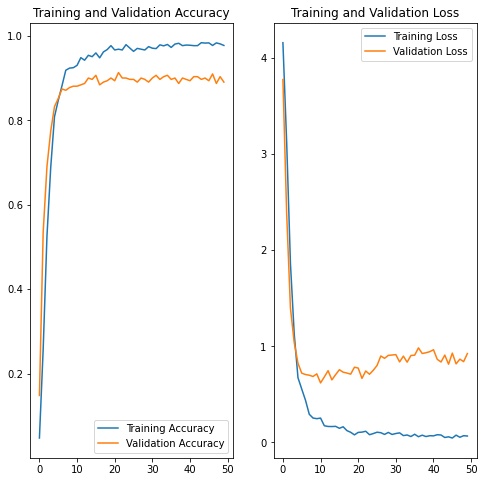

In [7]:
graphmodel(vartracker[0][2])

### Need Class Names for Each Model for Streamlit App

In [8]:
class_dict = {}

for poketype in typelist:
    train_ds, val_ds, test_ds = getds(poketype)
    class_names = train_ds.class_names
    class_dict[poketype] = class_names
    
with open('data/pokemon_class_dict.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in class_dict.items():
       writer.writerow([key, value])

Found 3062 files belonging to 72 classes.
Using 2144 files for training.
Found 3062 files belonging to 72 classes.
Using 918 files for validation.
Found 1045 files belonging to 29 classes.
Using 732 files for training.
Found 1045 files belonging to 29 classes.
Using 313 files for validation.
Found 1031 files belonging to 27 classes.
Using 722 files for training.
Found 1031 files belonging to 27 classes.
Using 309 files for validation.
Found 1792 files belonging to 40 classes.
Using 1255 files for training.
Found 1792 files belonging to 40 classes.
Using 537 files for validation.
Found 735 files belonging to 18 classes.
Using 515 files for training.
Found 735 files belonging to 18 classes.
Using 220 files for validation.
Found 1110 files belonging to 29 classes.
Using 777 files for training.
Found 1110 files belonging to 29 classes.
Using 333 files for validation.
Found 2177 files belonging to 53 classes.
Using 1524 files for training.
Found 2177 files belonging to 53 classes.
Using 653

## Evaluating Models on Test

In [25]:
test_scores = []
for p in range (len(vartracker)):
    temp = vartracker[p][3]
    test_scores.append(temp)

In [26]:
test_scores

[[1.0240557193756104, 0.9078947305679321],
 [1.046072244644165, 0.8839285969734192],
 [1.0718048810958862, 0.9017857313156128],
 [1.1988651752471924, 0.9005681872367859],
 [0.5987715721130371, 0.90625],
 [0.750961422920227, 0.9196428656578064],
 [0.9722002148628235, 0.875],
 [1.2572294473648071, 0.8705357313156128],
 [1.3275480270385742, 0.8815789222717285],
 [0.9887372255325317, 0.909375011920929],
 [0.37194129824638367, 0.9270833134651184],
 [0.9896005988121033, 0.8947916626930237],
 [1.1823145151138306, 0.8968750238418579],
 [0.8250484466552734, 0.9041666388511658],
 [0.8636563420295715, 0.9010416865348816],
 [1.1718134880065918, 0.9010416865348816],
 [0.836608350276947, 0.9005681872367859]]